In [1]:
from IPython.display import Image
import spacy 
import pandas as pd

# Introduction to spaCy

Spacy is a open-source software for natural language processing. The library is published under the MIT license. The library claims to be specifically designed for production use. The library is meant to assist building application for **information extraction**, **natural language understanding systems** or **pre-processing text for deep learning**. 

1. Supports 64 languages
2. 64 trained pipelines for 19 languages
3. Pre-trained vectors
4. Supports:
    - Name entity recognition
    - Part-of-speech tagging
    - Sentence segmentation
    - Text classification
    - Lemmatization
    - Morphology recognition
5. Supports custom models in PyTorch and TensorFlow 





### Load in the language class 

In [2]:
nlp = spacy.load("en_core_web_md")

The most important classes to know are: 
- Language Class
- Doc Class
- Token Class

Above we create a object of the **language class** which is usually called nlp. 
This object is used to process text and turns the text into a **Doc** object. 
The **Doc** object is an iterable and contains a sequence of **Tokens**. 

### The processing pipeline

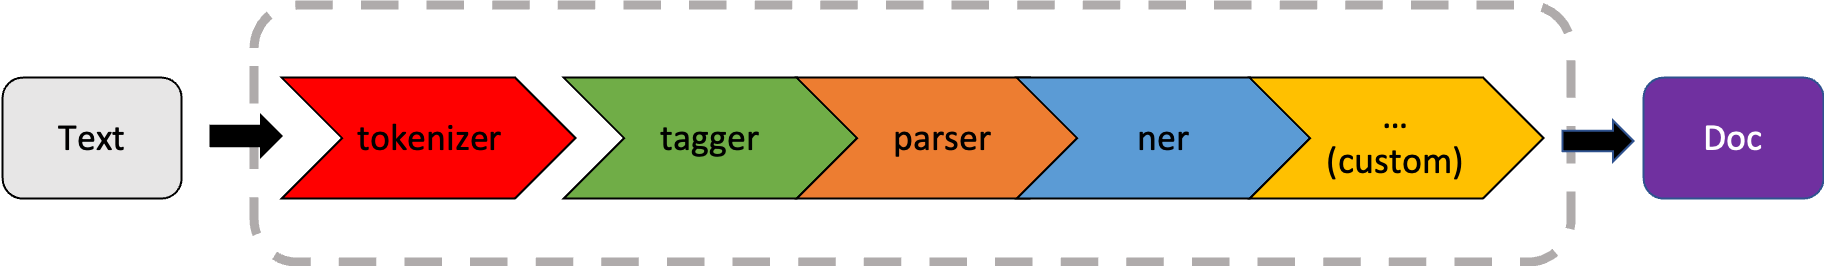

In [3]:
Image("pipeline.png")

### Tokenizer 

Tokenization is the task of splitting the text into meaningful segments (words), called tokens. The input of the **Tokenizer** is a unicode text/ string and it returns a **Doc** object. The basic rule is to split the text on whitespaces or by special characters depending if there are **prefix**, **suffix** or **infix**. Afterwards, more specific rules can be applied. These rules come with a specific language class. 
The **Tokenizer** can be extended to customized rules. 

### Tokenizer Example

In [4]:
from spacy.symbols import ORTH, TAG
doc_1 = nlp("Apple won't looking at buying U.K. ambitious startup for $1 billion")
print([token.text for token in doc_1])
# Add special case rule
special_case = [{ORTH: "look"}, {ORTH: "ing"}]
nlp.tokenizer.add_special_case("looking", special_case)
doc_2 =  nlp("Apple's owner won't looking at buying U.K. ambitious startup for $1 billion")
print([token.lemma_ for token in doc_2])

['Apple', 'wo', "n't", 'looking', 'at', 'buying', 'U.K.', 'ambitious', 'startup', 'for', '$', '1', 'billion']
['Apple', "'s", 'owner', 'will', 'not', 'look', 'e', 'at', 'buy', 'U.K.', 'ambitious', 'startup', 'for', '$', '1', 'billion']


### Lemmatization 

Lemmatization is a process of grouping inflected forms of a word together, like: walked, walks, walking to walk. 

### Part-of-speech tagging 

Tag a word with its grammatical meaning, like verb, noun, adjective etc. POS is done based word itself and its context. E.g. if we add **ambitious** in front of startup or not. 

### Linguistic Features

In [5]:
texts = []
lemmas = []
pos = []
tags = []
shapes = []
dependecies = []
stopwords = []
for token in doc_1:
    texts.append(token.text)
    lemmas.append(token.lemma_)
    pos.append(token.pos_)
    dependecies.append(token.dep_)
    shapes.append(token.shape_)
    stopwords.append(token.is_stop)
    
pd.DataFrame({"Text":texts, "Lemma": lemmas,  "POS":pos, "Dependencies": dependecies,
            "Shape": shapes, "StopWord":stopwords})

,Text,Lemma,POS,Dependencies,Shape,StopWord
0,Apple,Apple,PROPN,nsubj,Xxxxx,False
1,wo,will,AUX,aux,xx,False
2,n't,not,PART,neg,x'x,True
3,looking,look,VERB,ROOT,xxxx,False
4,at,at,ADP,prep,xx,True
5,buying,buy,VERB,pcomp,xxxx,False
6,U.K.,U.K.,PROPN,dobj,X.X.,False
7,ambitious,ambitious,ADJ,amod,xxxx,False
8,startup,startup,NOUN,dobj,xxxx,False
9,for,for,ADP,prep,xxx,True


### Dependency Parcing 

Dependency parcing analyses the grammatical structure of a sentence based on the relationship between two words. 

- NSUBJ: Nominal subject
- NMOND: Nominal modifier 
- AMOD: Adjectival modifier
- NEG: Negation
- DOBJ: Direct Object
- IOBJ: Indirect Object
- COMPOUND: Compounding and unanalyzed 
- AUXPASS: Special clausal dependents

According to: http://www.lrec-conf.org/proceedings/lrec2014/pdf/1062_Paper.pdf

In [6]:
from spacy import displacy
displacy.render(nlp("I want a big, but not a small computer"),jupyter=True)

## Sentence Segmentation 

1. Rule-based pipeline component

Easiest segmentation based on punctuations like .!?. Can be extandable by custome rules. 

2. Statistical sentence segmenter

Provides a trained/ trainable statistical model to predict sentence boundaries. The documentation does not give more insight.

3. Dependency Parser

It uses dependency parsing to set sentence boundaries, with a high accuarcy. The approach is recommended for big amount of "well-documented" text. It is not recommended for conversational text, social media etc. 

In [7]:
#Example of exluding the parser from the pipline and using the statistical sentence segmenter
nlp = spacy.load("en_core_web_sm", exclude=["parser"])
nlp.enable_pipe("senter")
doc = nlp("This is sentence number one, after me sentence number 2 starts. This is sentence number 2.")
for sent in doc.sents:
    print(sent.text)
#for sent in doc:
#    print(sent.dep)

This is sentence number one, after me sentence number 2 starts.
This is sentence number 2.


### Word Embeddings

Each word is embedding in a vector of length 300. The large vocabulary **en_core_web_lg** contains up to 685k words. 

In [8]:
nlp = spacy.load("en_core_web_md")
doc = nlp("apple banana horse øya")
for token in doc:
    print(f"Word not found in the vocabulary: {token.is_oov}")

Word not found in the vocabulary: False
Word not found in the vocabulary: False
Word not found in the vocabulary: False
Word not found in the vocabulary: True


### Word Similarities

Calculates the cosine similarity between word embeddings. 

In [9]:
print(f"The similarity between {doc[0].text} and {doc[1].text} is: {doc[0].similarity(doc[1])}")
print(f"The similarity between {doc[0].text} and {doc[2].text} is: {doc[0].similarity(doc[2])}")

The similarity between apple and banana is: 0.5831844806671143
The similarity between apple and horse is: 0.2544279992580414


The same works for sentence/ document similarities by calcuating the cosine similarity of the averaged word vectors.

In [10]:
doc_a = nlp("apple")
doc_b = nlp("pear")
print(f"The similarity between sentence A and B is {doc_a.similarity(doc_b)}")

The similarity between sentence A and B is 0.5968762340877272


### The spacy pipline under the hood

In [ ]:
lang = "en"
pipeline = ["tok2vec", "tagger", "parser", "ner", "attribute_ruler", "lemmatizer"]
data_path = "path/to/en_core_web_sm/en_core_web_sm-3.0.0"

cls = spacy.util.get_lang_class(lang)  # 1. Get Language class, e.g. English
nlp = cls()                            # 2. Initialize it
for name in pipeline:
    nlp.add_pipe(name)                 # 3. Add the component to the pipeline
nlp.from_disk(data_path)       

### Disabeling, excluding and modifying components

In [11]:
# Load the pipeline without the entity recognizer
nlp = spacy.load("en_core_web_sm", exclude=["ner"])

# Load the tagger and parser but don't enable them
nlp = spacy.load("en_core_web_sm", disable=["tagger", "parser"])
# Explicitly enable the tagger later on
nlp.enable_pipe("tagger")

### Customized pipeline components

In [12]:
from spacy.language import Language

@Language.component("my_component")
def my_component(doc):
    doc = doc[:-1]
    return doc

In [13]:
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("my_component")
doc = nlp("Some text to test")
for token in doc:
    print(token)

Some
text
to


### Customized Token Extension: getter, setter, methods

In [16]:
from spacy.tokens import Doc, Span, Token

has_building_part = lambda token: token.text in ["window", "kitchen", "basement", "building"]
#Token.set_extension("has_building_part", getter=has_building_part)
doc = nlp("I like the blue kitchen in the building.")
for token in doc:
    print(f"The word \033[1m{token}\033[0m is a building part: {token._.has_building_part}")

The word I is a building part: False
The word like is a building part: False
The word the is a building part: False
The word blue is a building part: False
The word kitchen is a building part: True
The word in is a building part: False
The word the is a building part: False
The word building is a building part: True
